In [1]:

import glob
import torch
from torch.utils.data import DataLoader

### Check GPU Status

In [2]:
if torch.cuda.is_available():
    print("CUDA is available. Running a test on the GPU.")
    
    device = torch.device("cuda")
    x = torch.rand(3, 3).to(device)
    print(f"Tensor on GPU: \n{x}")

    y = x * 2
    print(f"Result of operation on GPU: \n{y}")
else:
    print("CUDA is not available. Running on CPU.")

CUDA is not available. Running on CPU.


### Read in the Modules

In [3]:
from discriminator import Discriminator
from generator import UNet
from gan_utils import *

### Path to Data

In [4]:
coco_path = "/Users/mikey/.fastai/data/coco_sample/train_sample"
paths = glob.glob(coco_path + "/*.jpg") # Grabbing all the image file names

# Call the function with the desired number of images
num_imgs = 10
train_paths, val_paths = select_images(paths, num_imgs)
print(f"Training set: {len(train_paths)} images")
print(f"Validation set: {len(val_paths)} images")

Training set: 8 images
Validation set: 2 images


### Set Up Dataset

In [5]:
# image size
size = 256
train_ds = ColorizationDataset(size, paths = train_paths, split = "train")
val_ds = ColorizationDataset(size, paths = val_paths, split = "val")

### Setup Dataloader

In [6]:
train_dl = DataLoader(train_ds, batch_size = 4)
val_dl = DataLoader(val_ds, batch_size = 4)

**Check Tensor Size**

In [7]:
data = next(iter(train_dl))
Ls, abs_ = data['L'], data['ab']
print(Ls.shape, abs_.shape)
print(len(train_dl), len(val_dl))

torch.Size([4, 1, 256, 256]) torch.Size([4, 2, 256, 256])
2 1


### Params

In [8]:
# Assuming UNet is already defined as per the code above
generator = UNet()
discriminator = Discriminator()

# Use CUDA if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator.to(device)
discriminator.to(device)

# Loss functions
adversarial_loss = nn.BCELoss()  
l1_loss = nn.L1Loss()
l2_loss = nn.MSELoss()
perceptual_loos = PerceptualLoss

# Optimizers
lr = 0.0002
beta1 = 0.5
beta2 = 0.999
lambda_l1 = 100

optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr, betas=(beta1, beta2))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(beta1, beta2))

# training params
epochs = 2
batch_size = 16


### Training


========== Epoch 1/2 ==========


Training Epoch 1/2:   0%|          | 0/2 [00:00<?, ?it/s]/Users/mikey/Library/Mobile Documents/com~apple~CloudDocs/Code/roux_class_files/CS7180/Projects/image_enhancement/grey-to-color-image-using-a-GAN/models/gan_utils.py:67: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 7237 negative Z values that have been clipped to zero
  img_rgb = lab2rgb(img)
/Users/mikey/Library/Mobile Documents/com~apple~CloudDocs/Code/roux_class_files/CS7180/Projects/image_enhancement/grey-to-color-image-using-a-GAN/models/gan_utils.py:67: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 14604 negative Z values that have been clipped to zero
  img_rgb = lab2rgb(img)
/Users/mikey/Library/Mobile Documents/com~apple~CloudDocs/Code/roux_class_files/CS7180/Projects/image_enhancement/grey-to-color-image-using-a-GAN/models/gan_utils.py:67: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 8250 negative Z values that have been cl

****************************************************************************************************
Generated Images -- Real Images -- Black and White


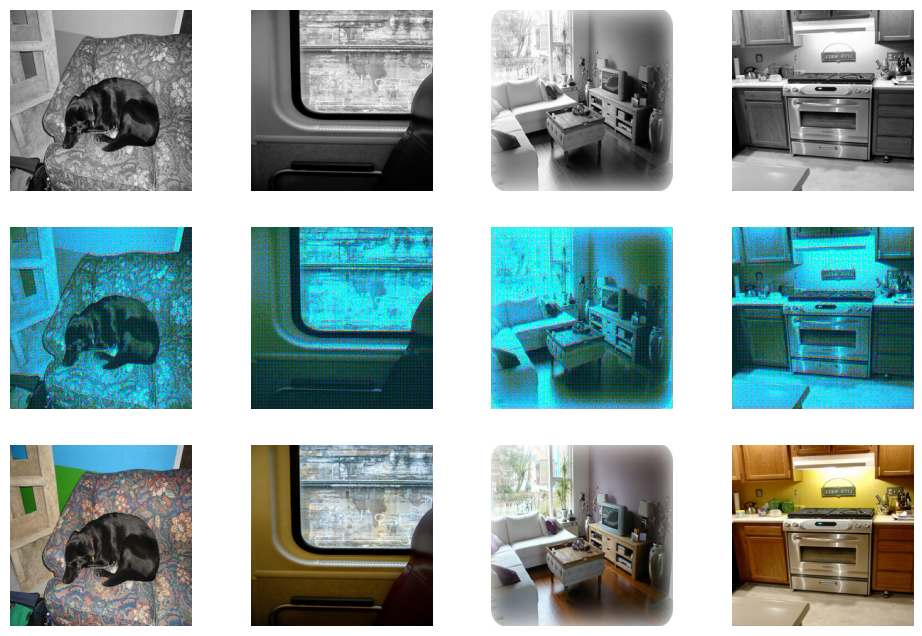

Validation Epoch 1/2: 100%|██████████| 1/1 [00:00<00:00,  6.48it/s, D_loss=0.695, G_loss=43.8]


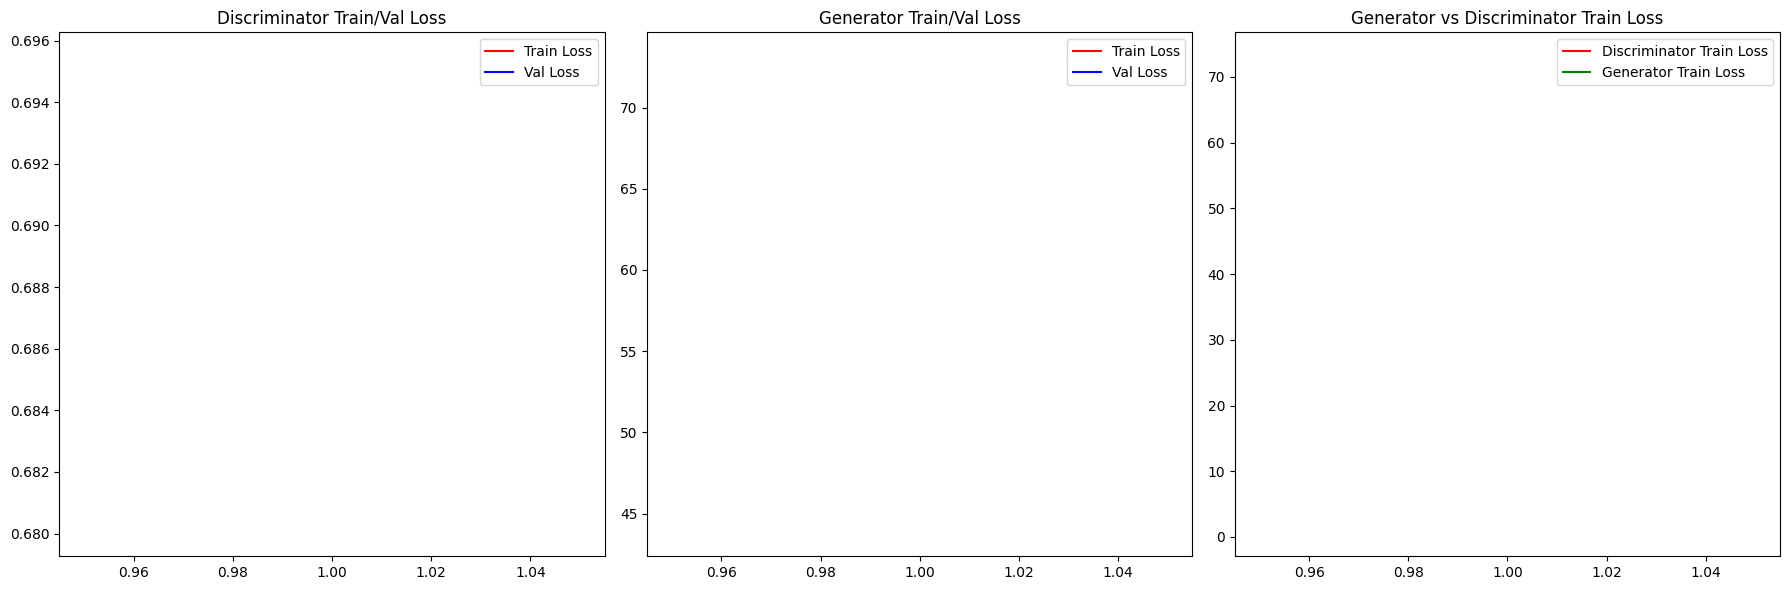


========== Epoch 2/2 ==========


Training Epoch 2/2:   0%|          | 0/2 [00:00<?, ?it/s]

****************************************************************************************************
Generated Images -- Real Images -- Black and White


/Users/mikey/Library/Mobile Documents/com~apple~CloudDocs/Code/roux_class_files/CS7180/Projects/image_enhancement/grey-to-color-image-using-a-GAN/models/gan_utils.py:67: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 4371 negative Z values that have been clipped to zero
  img_rgb = lab2rgb(img)
/Users/mikey/Library/Mobile Documents/com~apple~CloudDocs/Code/roux_class_files/CS7180/Projects/image_enhancement/grey-to-color-image-using-a-GAN/models/gan_utils.py:67: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 12525 negative Z values that have been clipped to zero
  img_rgb = lab2rgb(img)
/Users/mikey/Library/Mobile Documents/com~apple~CloudDocs/Code/roux_class_files/CS7180/Projects/image_enhancement/grey-to-color-image-using-a-GAN/models/gan_utils.py:67: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 4954 negative Z values that have been clipped to zero
  img_rgb = lab2rgb(img)
/Users/mikey/Libra

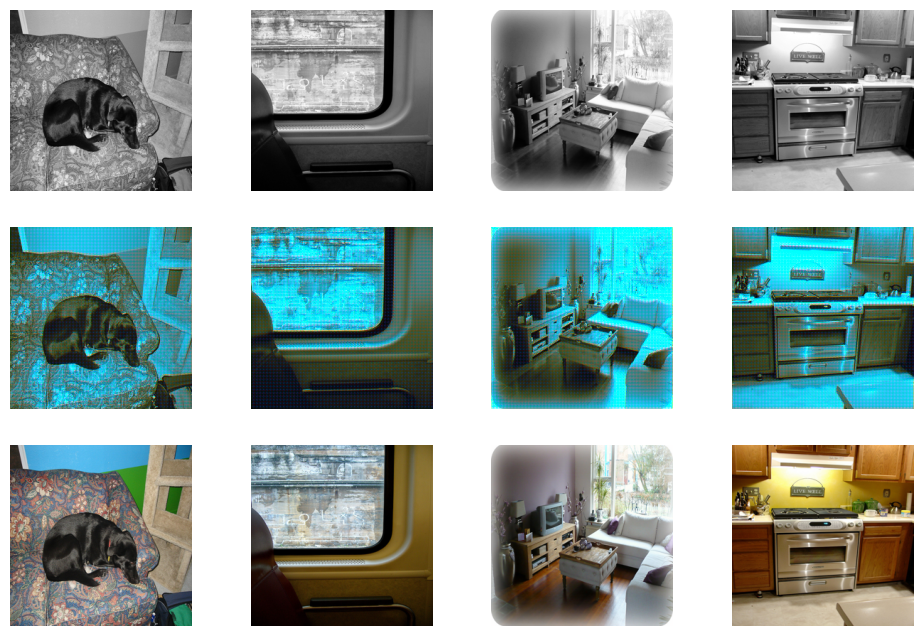

Validation Epoch 2/2: 100%|██████████| 1/1 [00:00<00:00,  6.52it/s, D_loss=0.702, G_loss=40.9]


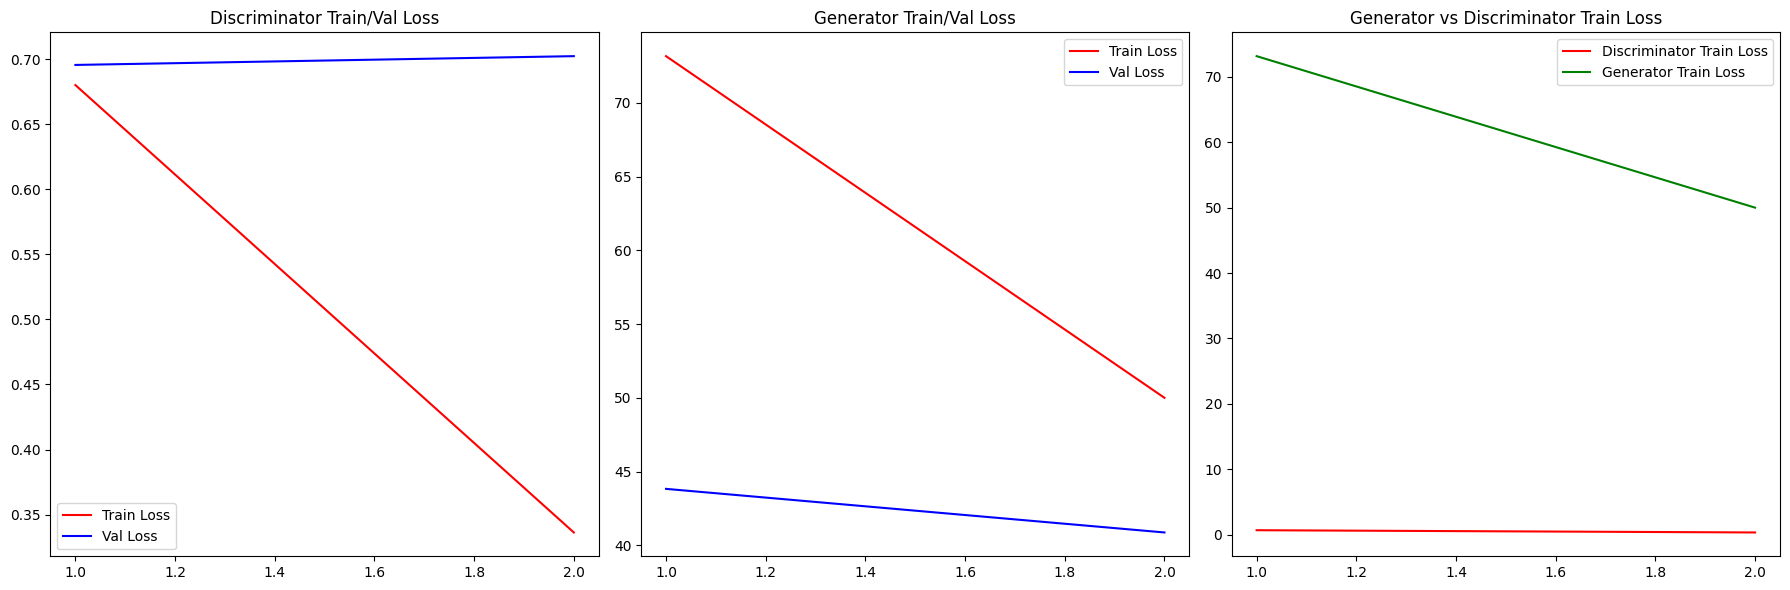

Generator weights saved to model_weights/2024-09-20_13-06-11_66568c7e-8f6c-4ea5-a107-9deb1ed9ca7a/generator_weights.pth
Discriminator weights saved to model_weights/2024-09-20_13-06-11_66568c7e-8f6c-4ea5-a107-9deb1ed9ca7a/discriminator_weights.pth

Training complete and model weights saved.


In [9]:

driver = GANDriver(
    generator=generator,
    discriminator=discriminator,
    train_dl=train_dl,
    val_dl=val_dl,
    optimizer_G=optimizer_G,
    optimizer_D=optimizer_D,
    adversarial_loss=adversarial_loss,
    l1_loss=l1_loss,
    lambda_l1=lambda_l1,
    device=device,
    epochs=epochs
)

# Run the GAN training
driver.run()